# Read in Data

In [1]:
import pandas as pd
import numpy as np

freqs_calced_from = None
# Load in Data
df = pd.read_csv('luc_nonfm.csv') # update to desired dataset

df



,gene,expression,stdev,20mer
0,Samhd1,3.49,0.25,GAUCUAAUGAAGGUAUUUAA
1,Panx1,4.61,0.37,UGCUUUGUUUUGUGAGGUAA
2,Panx1,5.07,0.08,GUUGGCAUGUAUCUACUUGA
3,Casp4,5.70,0.31,AAGGAGGAAGAUAAACAAAA
4,CTLA4,5.79,0.43,UUAAUGGUUUGAAUAUAAAC
...,...,...,...,...
351,Luc2p,109.21,8.64,CGGCUGGCAGAAGCUAUGAA
352,PDCD1,109.88,8.13,CAUUCCUGAAAUUAUUUAAA
353,PDCD1,113.42,1.88,CCCAUUCCUGAAAUUAUUUA
354,Pten,116.70,8.50,AGGUGAAGUUAUACUUCACA


# Split data into Functional/Nonfunctional/Undefined

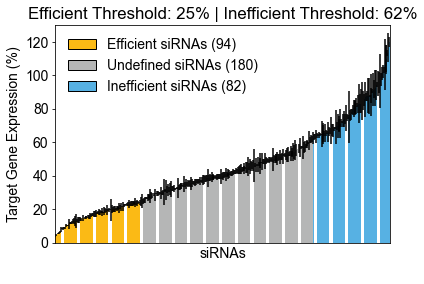

In [2]:
f_co = 25 # functional/efficient siRNA cutoff (%)
nf_co = 62 # nonfunctional/inefficient siRNA cutoff (%)

def classify_activity(x,f_co,nf_co):
    if x<f_co:
        return "functional"
    elif x > nf_co:
        return "nonfunctional"
    else:
        return "undefined"

df['activity'] = df['expression'].apply(lambda x: classify_activity(x,f_co,nf_co))

df['actual_activity_asnumeric'] = df['activity'].map({'functional': 1, 'nonfunctional': 0, 'undefined' : 0})


# Plot Classified siRNAs
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

font = {'weight' : 'normal','size'   : 14, "family":'sans-serif',"sans-serif":'Arial'}
matplotlib.rc('font', **font)

# Colors
f_color ="#FBBA15"
u_color = "#B5B6B6"
nf_color =  "#57B1E3"

colors_ls = ([f_color]*df['activity'].value_counts()['functional']+
          [u_color]*df['activity'].value_counts()['undefined']+
          [nf_color]*df['activity'].value_counts()['nonfunctional'])
         

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(w = 6, h = 4)

rects = ax.bar(
    x = range(len(df)),
    height=df['expression'],
    color = colors_ls,
    yerr=df['stdev'],
)
# Set axes to start/end where desired
ax.set_xlim(0,len(df))
ax.set_ylim(0,np.round(max(df.expression))+10)
# Remove x-axis ticks
ax.set_xticks([])
ax.set_yticks(list(np.arange(0,round(max(df.expression))+20,20)))

# LABEL PLOT 
ax.set_xlabel('siRNAs\n',font='Arial')
ax.set_ylabel('Target Gene Expression (%)',font='Arial')
ax.set_title("Efficient Threshold: "+str(f_co)+"% | Inefficient Threshold: "+str(nf_co)+"%")

# Add legend
legend_elements = [Patch(facecolor=f_color, edgecolor='black',label='Efficient siRNAs ('+str(df['activity'].value_counts()['functional'])+')'),
                   Patch(facecolor=u_color, edgecolor='black',label='Undefined siRNAs ('+str(df['activity'].value_counts()['undefined'])+')'),
                   Patch(facecolor=nf_color, edgecolor='black',label='Inefficient siRNAs ('+str(df['activity'].value_counts()['nonfunctional'])+')'),
                  ]
ax.legend(handles=legend_elements,frameon=False)





# Encode sequence

In [3]:
def encode_sequence(seq):
    encoded_seq = []
    edict = {'A':[1,0,0,0],'U':[0,1,0,0],'T':[0,1,0,0],'C':[0,0,1,0],'G':[0,0,0,1]}
    for s in seq:
        encoded_seq += (edict[s]) # if want to encode as one long list
    return encoded_seq

df['encoded_20mer'] = df['20mer'].apply(lambda x: encode_sequence(x))

df


,gene,expression,stdev,20mer,activity,actual_activity_asnumeric,encoded_20mer
0,Samhd1,3.49,0.25,GAUCUAAUGAAGGUAUUUAA,functional,1,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ..."
1,Panx1,4.61,0.37,UGCUUUGUUUUGUGAGGUAA,functional,1,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, ..."
2,Panx1,5.07,0.08,GUUGGCAUGUAUCUACUUGA,functional,1,"[0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
3,Casp4,5.70,0.31,AAGGAGGAAGAUAAACAAAA,functional,1,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
4,CTLA4,5.79,0.43,UUAAUGGUUUGAAUAUAAAC,functional,1,"[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, ..."
...,...,...,...,...,...,...,...
351,Luc2p,109.21,8.64,CGGCUGGCAGAAGCUAUGAA,nonfunctional,0,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ..."
352,PDCD1,109.88,8.13,CAUUCCUGAAAUUAUUUAAA,nonfunctional,0,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ..."
353,PDCD1,113.42,1.88,CCCAUUCCUGAAAUUAUUUA,nonfunctional,0,"[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, ..."
354,Pten,116.70,8.50,AGGUGAAGUUAUACUUCACA,nonfunctional,0,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, ..."


# Train Random Forest Classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200,
                       max_depth=3,
                       min_samples_leaf=1)

# exclude undefined siRNAs
df_noundef = df[df['activity'] != 'undefined']
df_noundef= df_noundef.reset_index(drop=True)
# remove previous predictions  (that were predicted using linear)
x_vals = df_noundef['encoded_20mer']
x_vals = list(x_vals)
x_vals = np.array(x_vals)

y_vals = df_noundef['actual_activity_asnumeric']
y_vals = np.array(y_vals)

clf.fit(x_vals,y_vals)


RandomForestClassifier(max_depth=3, n_estimators=200)

## Compute Prediction Classes using Classifier

In [5]:
df_noundef['predicted_activity_asnumeric'] = clf.predict(x_vals)
df_noundef


,gene,expression,stdev,20mer,activity,actual_activity_asnumeric,encoded_20mer,predicted_activity_asnumeric
0,Samhd1,3.49,0.25,GAUCUAAUGAAGGUAUUUAA,functional,1,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...",1
1,Panx1,4.61,0.37,UGCUUUGUUUUGUGAGGUAA,functional,1,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, ...",1
2,Panx1,5.07,0.08,GUUGGCAUGUAUCUACUUGA,functional,1,"[0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",1
3,Casp4,5.70,0.31,AAGGAGGAAGAUAAACAAAA,functional,1,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1
4,CTLA4,5.79,0.43,UUAAUGGUUUGAAUAUAAAC,functional,1,"[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...",1
...,...,...,...,...,...,...,...,...
171,Luc2p,109.21,8.64,CGGCUGGCAGAAGCUAUGAA,nonfunctional,0,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...",0
172,PDCD1,109.88,8.13,CAUUCCUGAAAUUAUUUAAA,nonfunctional,0,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...",0
173,PDCD1,113.42,1.88,CCCAUUCCUGAAAUUAUUUA,nonfunctional,0,"[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, ...",0
174,Pten,116.70,8.50,AGGUGAAGUUAUACUUCACA,nonfunctional,0,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, ...",0


In [6]:
# Identify prediction classes (TP/TN/FN/FP) 
def get_prediction_class(x):
    if x['actual_activity_asnumeric'] == 1: # is actually positive
        if x['predicted_activity_asnumeric'] == 1: # correct prediction
            return "TP"
        else: # incorrectly predicted to be negative
            return "FN" 
    else: # is actually negative
        if x['predicted_activity_asnumeric'] == 1: # incorrectly predicted to be positive
            return "FP"
        else: # correctly predicted to be negative
            return "TN"

    print(x['actual_activity_asnumeric'],x['predicted_activity_asnumeric'])

df_noundef['pred_class'] = df_noundef[['actual_activity_asnumeric','predicted_activity_asnumeric']].apply(lambda x: get_prediction_class(x), axis =1)

df_noundef['pred_class'].value_counts()





TP    92
TN    60
FP    22
FN     2
Name: pred_class, dtype: int64

In [7]:
freqs_calced_from = 'encoded_sequence'
freq_TP_df = pd.DataFrame(list(df_noundef[df_noundef['pred_class'] == 'TP']['encoded_20mer'] ))
avg_TP = freq_TP_df.apply(lambda x: np.average(x))

freq_FP_df = pd.DataFrame(list(df_noundef[df_noundef['pred_class'] == 'FP']['encoded_20mer'] ))
avg_FP = freq_FP_df.apply(lambda x: np.average(x))

freq_TN_df = pd.DataFrame(list(df_noundef[df_noundef['pred_class'] == 'TN']['encoded_20mer'] ))
avg_TN = -1*freq_TN_df.apply(lambda x: np.average(x))

freq_FN_df = pd.DataFrame(list(df_noundef[df_noundef['pred_class'] == 'FN']['encoded_20mer'] ))
avg_FN = -1*freq_FN_df.apply(lambda x: np.average(x))

# Sum weights 
sum_weights = (avg_TP + avg_FP + avg_TN + avg_FN)
sum_weights

# Convert to weight matrix 
a_imps = list(sum_weights[::4])
u_imps = list(sum_weights[1::4])
c_imps = list(sum_weights[2::4])
g_imps = list(sum_weights[3::4])

weight_matrix_proxy_rf = pd.DataFrame({"A":a_imps,"U":u_imps,"C":c_imps,"G":g_imps,})

weight_matrix_proxy_rf



,A,U,C,G
0,-0.172793,0.235441,-0.341897,0.279249
1,-0.713900,0.293742,0.236364,0.183794
2,0.064625,0.009223,0.305007,-0.378854
3,-0.134321,0.547628,0.015547,-0.428854
4,0.372727,-0.209947,0.262253,-0.425033
5,0.231291,-0.171344,-0.124572,0.064625
6,-0.000659,0.323254,-0.694071,0.371476
7,0.438669,0.760343,-1.429710,0.230698
8,-0.897694,0.289723,0.303689,0.304282
9,-1.039196,0.645323,0.334848,0.059025


In [8]:
# Normalize
largest = max(max(weight_matrix_proxy_rf['A']),
    max(weight_matrix_proxy_rf['U']),
    max(weight_matrix_proxy_rf['C']),
    max(weight_matrix_proxy_rf['G']))

smallest = min(min(weight_matrix_proxy_rf['A']),
    min(weight_matrix_proxy_rf['U']),
    min(weight_matrix_proxy_rf['C']),
    min(weight_matrix_proxy_rf['G']))
print("largest:",largest)
print("smallest:",smallest)
if abs(smallest) > largest:
    norm_val = abs(smallest)
else:
    norm_val = largest
print("normalize to:",norm_val)

weight_matrix_proxy_rf = weight_matrix_proxy_rf.apply(lambda x: np.round((100*(x/norm_val)),0)).astype('int64')
# cutoff at 20
weight_matrix_proxy_rf = weight_matrix_proxy_rf.where((weight_matrix_proxy_rf > 20) | ( weight_matrix_proxy_rf < -20), 0)
display(weight_matrix_proxy_rf)



largest: 0.7603425559947299
smallest: -1.4297101449275362
normalize to: 1.4297101449275362


,A,U,C,G
0,0,0,-24,0
1,-50,21,0,0
2,0,0,21,-26
3,0,38,0,-30
4,26,0,0,-30
5,0,0,0,0
6,0,23,-49,26
7,31,53,-100,0
8,-63,0,21,21
9,-73,45,23,0


# Plot Proxy and Original RF Weight Matrix

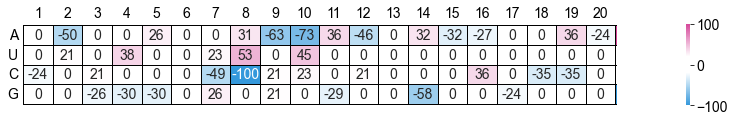

In [11]:
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

font = {'weight' : 'normal','size'   : 14, "family":'sans-serif',"sans-serif":'Arial'}
matplotlib.rc('font', **font)

# Colors
positive_color ="#d54699"#"#fcba03"#"magenta"
negative_color =  "#3498db"#"cyan"

norm = matplotlib.colors.Normalize(-100,100)
colors = [[norm(-100), negative_color],
          [norm(-20), "white"],
          [norm(0), "white"],
          [norm( 20), "white"],
          [norm( 100), positive_color]]

cm = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

######################### PLOT 1 #########################
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(w = 14, h = 1.5)

weight_matrix_to_plot_1 = weight_matrix_proxy_rf.copy()
# add extra row that will be hidden later (just for coloring matrix with proper scale)
weight_matrix_to_plot_1 = weight_matrix_to_plot_1.append(pd.DataFrame({"A":[100],"U":[20],"C":[-20],"G":[-100]}))
weight_matrix_to_plot_1 = weight_matrix_to_plot_1.transpose()
weight_matrix_to_plot_1.columns = list(range(1,len(weight_matrix_to_plot_1.columns)))+['']

sns.heatmap(weight_matrix_to_plot_1,
            annot=True,
            cmap=cm,
            linewidths=0.5,
            linecolor='black',
            fmt='g',
            ax = ax,
           )
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis=u'both', which=u'both',length=0) # remove tick lines
ax.tick_params(rotation=0) # rotate y-axis labels 

# Hide 21st column
from matplotlib.patches import Rectangle
ax.add_patch(Rectangle((20.09, 0), # position in heat map (origin is at bottom left)
                       1.01, # box width
                       4.0, # box height
                       fill=True, edgecolor=None, color='white',lw=2,zorder=10))

# fix for mpl bug that cuts off top/bottom/left/right of seaborn viz
b, t = ax.get_ylim() # discover the values for bottom and top
ax.set_ylim(b+0.05, t-0.05) # update the ylim(bottom, top) values
l, r = ax.get_xlim() # discover the values for left and right
ax.set_xlim(l-0.05, r+0.05) # update the xlim(left, right) values


plt.show()



